In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#### Loading the data

In [2]:
df=pd.read_csv("IMDB_Dataset.csv")

#### Checking the first 5 column for an overall understanding of the data

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### Checking the last 5 column

In [4]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


#### Grabbing a review

In [5]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

## Exploratory data analysis

###### This method is used to obtain a concise summary of a DataFrame. It would provide information such as the data types of each column, the number of non-null values, and memory usage.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


###### Checking for null values

In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

#### As we can see, we don't have any null values in our data

#### Checking for duplicated values

In [8]:
df.duplicated().sum()

418

#### As we can see, there are 418 duplicated values which needs to be removed

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

##### Encoding the Sentiment column. Here, Label encoding technique used to convert categorical data, which consists of labels or categories, into numerical format. This is necessary because machine learning algorithms require numerical input, and cannot directly process categorical data.

In [11]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [12]:
sentiment=enc.fit_transform(df["sentiment"])

In [13]:
df["sentiment"]=sentiment

In [14]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


#### As we can see above, we have successfully encoded the "sentiment" column

## Data Visualization

In [15]:
positive_corpus=' '.join(df['review'][df['sentiment']==1])
negative_corpus=' '.join(df['review'][df['sentiment']==0])

#### Printing the most used words in the positive sentiment so that we have a general understanding of words commonly used in the postive and negative reviews 

#### Here we are importing wordcloud which is a visual representation of text data where words are displayed in different sizes, with the size of each word indicating its frequency or importance within the given text. The more frequently a word appears, the larger and bolder it appears.

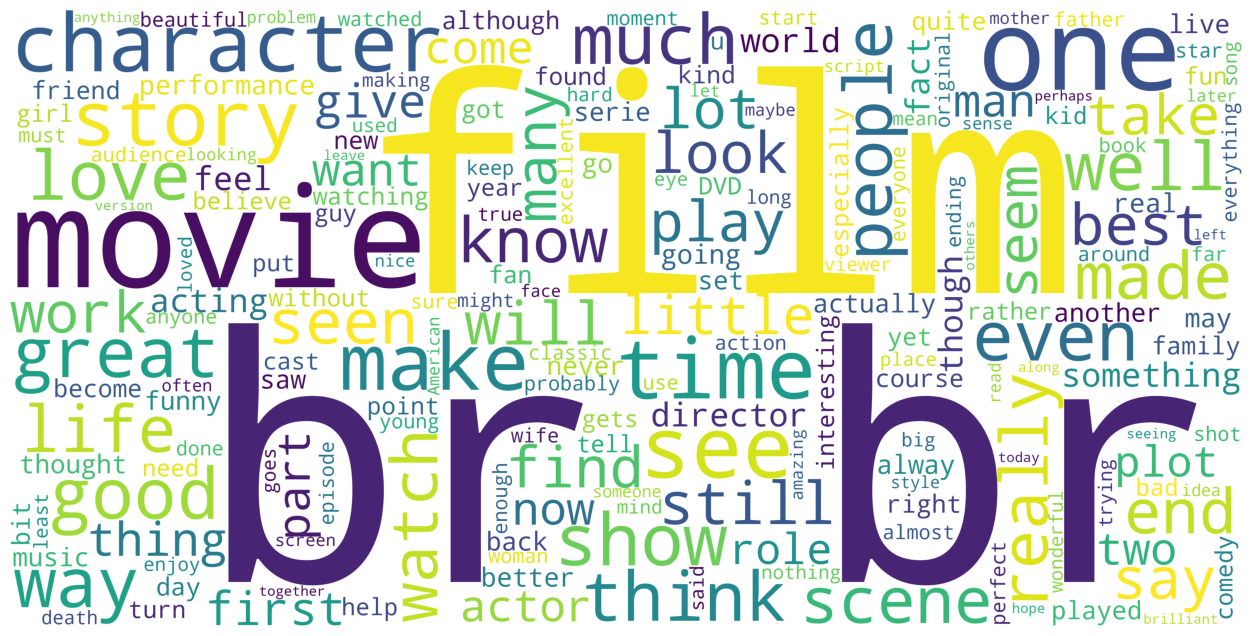

In [16]:
from wordcloud import WordCloud,STOPWORDS
positive_cloud=WordCloud(stopwords=STOPWORDS,background_color='white',height=2000,width=4000).generate(positive_corpus)
plt.figure(figsize=[16,8])
plt.imshow(positive_cloud)
plt.axis("off")
plt.show()

#### Printing the most used words in the negative sentiment

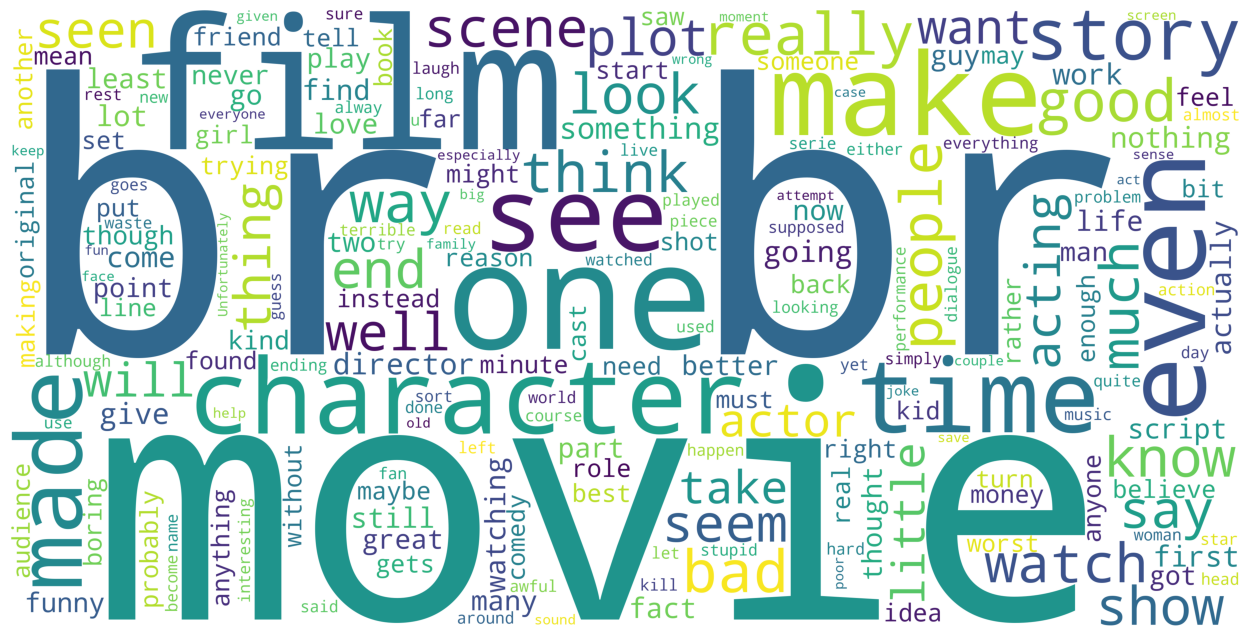

In [17]:
negative_cloud=WordCloud(stopwords=STOPWORDS,background_color='white',height=2000,width=4000).generate(negative_corpus)
plt.figure(figsize=[16,8])
plt.imshow(negative_cloud)
plt.axis("off")
plt.show()

## Data Preprocessing
#### 1. Sample 10000 rows - Here we will train our model on any random 10000 data from our dataset as using all 50000 data is causing our jupyter notebook to lag.
#### 2. Removing html tags - Our reviews have html tags because this data is scraped from the internet so we will have to remove the html tags.
#### 3. Converting everything to lower case - Here we will convert all the words to lower case so that our machine dosen't consider the same uppercased and lowercased word as two different words. This ensures consistency.
#### 4. Removing all punctuations - We will remove all the punctuations used in the reviews as it is of no use.
#### 5. Spelling correction - Here we will correct all the spelling mistakes in the reviews using the .correct() function
#### 6. Tokenization - This involves breaking down a text into smaller units called tokens.
#### 7. Removing stop words - Stop words are words like and,or,the,from which exist in the reviews and are of no use in training the model so we will remove them.
#### 8. Stemming - This will convert all the similar words to the most basic version of the word. Example - playing, played will all be converted to play.

#### Taking the sample of 10000 data 

In [18]:
df=df.iloc[:10000]

In [19]:
df.shape

(10000, 2)

#### Function to clean html tags

In [20]:
import re

In [21]:
def clean_html(text):
    clean = re.compile("<.*?>")
    return re.sub(clean,"",text)

#### Here this function takes the input text (text), finds anything that matches the HTML tag pattern (clean), and then replaces it with nothing (""). This effectively removes the HTML tags from the input text.

In [22]:
clean_html("hello<> everyone how <br>are all doing")

'hello everyone how are all doing'

#### Applying the function "clean_html" to the review column

In [23]:
df["review"]=df["review"].apply(clean_html)

#### Converting everything to lower case

In [24]:
def convert_lower(text):
    return text.lower()

#### The convert_lower function is a simple text processing function that takes a string (text) as input and returns a new string where all the characters are converted to lowercase. 

In [25]:
convert_lower("HeLLo evEryoOne hOW are All DoinG")

'hello everyoone how are all doing'

#### Applying the function "convert_lower" to the review column

In [26]:
df["review"]=df["review"].apply(convert_lower)

#### Removing all the punctuations from the reviews

#### Getting all the predefined punctuations

In [27]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
exclude = string.punctuation

In [29]:
def punct(text):
    return text.translate(str.maketrans('','',exclude))

#### The punct function removes all punctuation characters like commas, !, %, & from a given text. It does this by creating a rule that says, don't replace anything with any other character, just remove the characters specified in exclude which is a predefined set of punctuation characters. Then, it applies this rule to the input text using text.translate(). The result is a cleaned-up text without any of the specified punctuation marks.

In [30]:
punct("hello$ %#everyone/\; ^&how are all doing")

'hello everyone how are all doing'

#### Applying the function "punct" to the review column

In [31]:
df['review'] = df['review'].apply(punct)

#### Spelling correction

In [32]:
from textblob import TextBlob

In [33]:
def spell(text):
    blob = TextBlob(text)
    return blob.correct().string

#### Here, the spell function takes the text, uses TextBlob to process the textual data, and then uses .correct().string to give us back the corrected string version of the text.

#### Applying the function "spell" to the review column

In [34]:
#df['review'].apply(spell)

#### I am commenting this line of code as of now because it is taking too much time to apply the spelling correction function on all the 10000 datas. You can just uncomment this code and check if "spell" function is getting applied smoothly.

#### Tokenization of words

In [35]:
import nltk

In [36]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

#### The function tokenize_text  uses NLTK's word tokenizer to break a given text into a list of words.

In [37]:
tokenize_text("hello everyone how are all doing")

['hello', 'everyone', 'how', 'are', 'all', 'doing']

#### Applying the function "tokenize_text" to the review column

In [38]:
df['review'].apply(tokenize_text)

0        [one, of, the, other, reviewers, has, mentione...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, this, was, a, wonderful, way, to,...
3        [basically, theres, a, family, where, a, littl...
4        [petter, matteis, love, in, the, time, of, mon...
                               ...                        
10012    [i, was, pleasantly, surprised, to, find, that...
10013    [this, is, a, very, moving, film, that, takes,...
10014    [apart, from, the, beautiful, imagery, thanks,...
10015    [this, is, a, perfect, series, for, family, vi...
10016    [a, really, very, bad, movie, with, a, very, f...
Name: review, Length: 10000, dtype: object

#### Removing stopwords

In [39]:
from nltk.corpus import stopwords

#### Getting the pre-defined set of stopwords

In [40]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
stop_words= stopwords.words('english')

In [42]:
def remove_stopwords(text):
    x=[]
    for i in text.split() :
        if i not in stop_words:
            x.append(i)
    y=x[:]
    x.clear()
    return y

#### This function takes a text input, splits it into words, removes stopwords, and returns a list of words without the stopwords.

In [43]:
remove_stopwords("hello everyone how are all doing")

['hello', 'everyone']

#### Applying the function "remove_stopwords" to the review column

In [44]:
df['review']= df.review.apply(remove_stopwords)

#### Stemming

In [45]:
from nltk.stem.porter import PorterStemmer

In [46]:
ps=PorterStemmer()
def stem_words(text):
    s=[]
    for i in text:
        s.append(ps.stem(i))
    t=s[:]
    s.clear()
    return t

#### This function applies the porter stemming algorithm to each word in the input list (text) and returns a list of the stemmed words. 

In [47]:
stem_words(["I","loved","loving","it"])

['i', 'love', 'love', 'it']

#### Applying the function "stem_words" to the review column

In [48]:
df['review']= df.review.apply(stem_words)

In [49]:
df.head()

,review,sentiment
0,"[one, review, mention, watch, 1, oz, episod, y...",1
1,"[wonder, littl, product, film, techniqu, unass...",1
2,"[thought, wonder, way, spend, time, hot, summe...",1
3,"[basic, there, famili, littl, boy, jake, think...",0
4,"[petter, mattei, love, time, money, visual, st...",1


In [50]:
# Join_back
def join_back(list):
    return " ".join(list)

#### This code takes a list of strings as input and returns a single string by joining the elements of the list
#### Doing this was necessary or else we are getting an error on the feature extraction part

In [51]:
df['review']= df.review.apply(join_back)

In [52]:
df.head()

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1


## Feature Extraction

#### Using Bag Of Words because the text needs to be converted into a numerical format for analysis

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
cv=CountVectorizer(max_features=10000)
#tfidf = TfidfVectorizer(max_features=10000)

In [55]:
x=cv.fit_transform(df["review"]).toarray()
#x=tfidf.fit_transform(df["review"]).toarray()

In [56]:
x.shape

(10000, 10000)

In [57]:
y=df.iloc[:,-1].values

In [58]:
y.shape

(10000,)

## Model Training

#### Here, the data is split a dataset into two subsets: one for training a model and the other for testing its performance. The main purpose of this split is to evaluate how well the trained model generalizes to new, unseen data. 

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [61]:
x_train.shape

(7000, 10000)

In [62]:
x_test.shape

(3000, 10000)

In [63]:
y_train.shape

(7000,)

In [64]:
y_test.shape

(3000,)

## Model Selection

#### Multinomial Naive Bayes

In [65]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
mdl1=MultinomialNB()

In [67]:
mdl1.fit(x_train,y_train)

MultinomialNB()

In [68]:
y_pred_1=mdl1.predict(x_test)

## Model Evaluation

In [69]:
from sklearn.metrics import classification_report,accuracy_score

In [70]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1502
           1       0.86      0.82      0.84      1498

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



## Error Analysis

In [71]:
from sklearn import metrics

In [72]:
cf_matrix=metrics.confusion_matrix(y_test,y_pred_1)
cf_matrix

array([[1306,  196],
       [ 274, 1224]], dtype=int64)

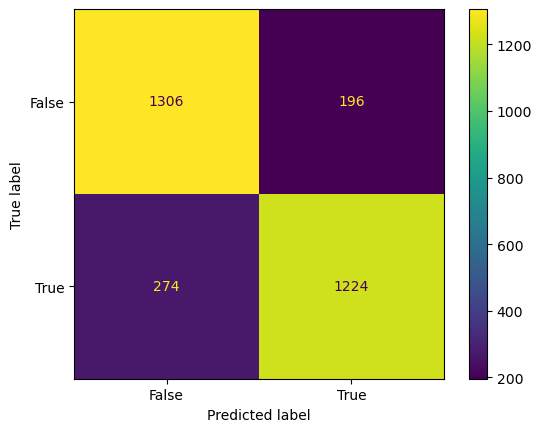

In [73]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#### Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
logreg=LogisticRegression()

In [76]:
logreg.fit(x_train, y_train)

C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
y_pred_2=logreg.predict(x_test)

In [78]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1502
           1       0.84      0.86      0.85      1498

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



In [79]:
cf_matrix=metrics.confusion_matrix(y_test,y_pred_2)
cf_matrix

array([[1263,  239],
       [ 212, 1286]], dtype=int64)

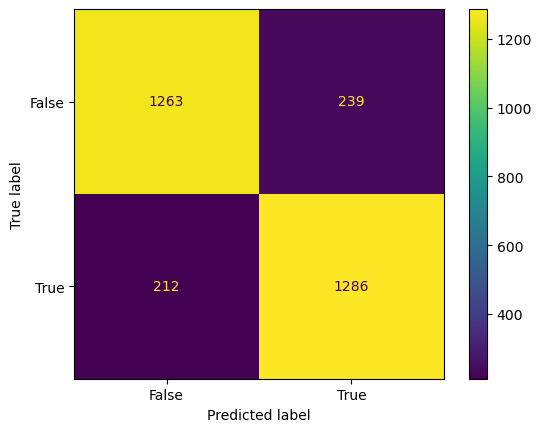

In [80]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf_model=RandomForestClassifier()

In [83]:
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [84]:
y_pred_3=rf_model.predict(x_test)

In [85]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1502
           1       0.84      0.84      0.84      1498

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



In [86]:
cf_matrix=metrics.confusion_matrix(y_test,y_pred_3)
cf_matrix

array([[1260,  242],
       [ 245, 1253]], dtype=int64)

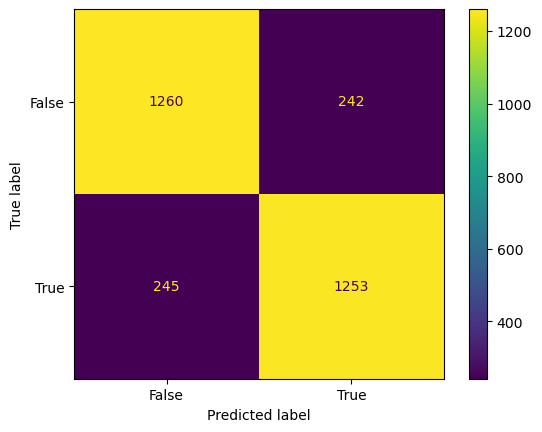

In [87]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Fine Tuning

### Hyperparameter Tuning

#### Multinomial Naive Bayes

In [88]:
param_grid_1=[{"alpha":[0.1, 0.5, 1.0, 1.5, 2.0],
"fit_prior":[True, False],
"class_prior":[None, [0.2, 0.8], [0.3, 0.7]]}]

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
clf_1=GridSearchCV(mdl1,param_grid=param_grid_1,cv=2,verbose=3,n_jobs=-1)

In [91]:
best_clf_1=clf_1.fit(x_train,y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


In [92]:
best_clf_1.best_params_

{'alpha': 1.5, 'class_prior': [0.2, 0.8], 'fit_prior': True}

In [93]:
y_pred1=clf_1.predict(x_test)

In [94]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1502
           1       0.84      0.85      0.85      1498

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



#### Logistic Regression

In [95]:
param_grid_2=[{"penalty":["l1","l2"],
            "C":np.logspace(4,15),
            "solver":["lbfgs","liblinear"],
            "max_iter":[5,10]}]

In [96]:
clf_2=GridSearchCV(logreg,param_grid=param_grid_2,cv=2,verbose=2,n_jobs=-1)

In [97]:
best_clf_2=clf_2.fit(x_train,y_train)

Fitting 2 folds for each of 400 candidates, totalling 800 fits


C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py

In [98]:
best_clf_2.best_params_

{'C': 10000.0, 'max_iter': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

In [99]:
y_pred2=clf_2.predict(x_test)

In [100]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1502
           1       0.85      0.87      0.86      1498

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



#### Random Forest

In [101]:
param_grid_3 = {
    'n_estimators': [20,60,80],
    'max_depth': [None,2,3], 
    'max_samples' : [0.25,0.5]
}

In [102]:
clf_3=GridSearchCV(rf_model,param_grid=param_grid_3,cv=2,scoring='accuracy',n_jobs=-1)

In [103]:
best_clf_3=clf_3.fit(x_train,y_train)

In [104]:
best_clf_3.best_params_

{'max_depth': None, 'max_samples': 0.5, 'n_estimators': 80}

In [105]:
y_pred3=clf_3.predict(x_test)

In [106]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1502
           1       0.84      0.84      0.84      1498

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



### Using Bagging Classifier

In [107]:
from sklearn.ensemble import BaggingClassifier

#### Multinomial Naive Bayes

In [108]:
base_model_1=MultinomialNB()

In [109]:
bagging_model_1=BaggingClassifier(base_model_1, n_estimators=10, max_samples=0.8, random_state=42)

In [110]:
bagging_model_1.fit(x_train,y_train)

BaggingClassifier(estimator=MultinomialNB(), max_samples=0.8, random_state=42)

In [111]:
y_pred_10=bagging_model_1.predict(x_test)

In [112]:
print(classification_report(y_test,y_pred_10))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1502
           1       0.86      0.82      0.84      1498

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



#### Logistic Regression

In [113]:
base_model_2=LogisticRegression()

In [114]:
bagging_model_2=BaggingClassifier(base_model_2, n_estimators=10, max_samples=0.8, random_state=42)

In [115]:
bagging_model_2.fit(x_train,y_train)

C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SIMRAN SHAIKH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

BaggingClassifier(estimator=LogisticRegression(), max_samples=0.8,
                  random_state=42)

In [116]:
y_pred_11=bagging_model_2.predict(x_test)

In [117]:
print(classification_report(y_test,y_pred_11))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1502
           1       0.84      0.87      0.86      1498

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



#### Random Forest

In [118]:
base_model_3=RandomForestClassifier()

In [119]:
bagging_model_3 = BaggingClassifier(base_model_3, n_estimators=10, max_samples=0.8, random_state=42)

In [120]:
bagging_model_3.fit(x_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(), max_samples=0.8,
                  random_state=42)

In [121]:
y_pred_12=bagging_model_3.predict(x_test)

In [122]:
print(classification_report(y_test,y_pred_12))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1502
           1       0.84      0.84      0.84      1498

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000

